# Baseline Model

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Training set: 15 Dec 2018 - 31 Dec 2018

In [5]:
train_set = pd.read_csv('../data/train_dec2018.csv')
train_set.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,fl_datetime
0,2018-12-22,UA,UA_CODESHARE,UA,3807,ZW,N467AW,3807,11721,FNT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-22
1,2018-12-19,DL,DL,DL,2402,DL,N338DN,2402,10423,AUS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-19
2,2018-12-23,UA,UA_CODESHARE,UA,4357,EV,N11544,4357,11267,DAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-23
3,2018-12-16,WN,WN,WN,4483,WN,N275WN,4483,14771,SFO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-16
4,2018-12-18,AA,AA,AA,2539,AA,N812NN,2539,14122,PIT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-18


In [3]:
# Summary statistics for arr_delay

train_set['arr_delay'].describe()

count    40605.000000
mean         5.161556
std         45.456257
min       -102.000000
25%        -15.000000
50%         -5.000000
75%         10.000000
max       1214.000000
Name: arr_delay, dtype: float64

In [6]:
# train_set['arr_delay'].quantile(q=0.99) -> 184

# for training we will remove arr_delay > 200

train_set = train_set.drop(train_set.index[train_set['arr_delay'] > 200])
train_set.shape

(40277, 43)

In [7]:
train_set['arr_delay'].describe()

count    40277.000000
mean         2.545721
std         32.001592
min       -102.000000
25%        -15.000000
50%         -5.000000
75%          9.000000
max        200.000000
Name: arr_delay, dtype: float64

In [8]:
from modules.data_prep import hhmm_to_min

# Add new columns (convert hhmm time into minutes)
train_set['crs_dep_time_min'] = train_set['crs_dep_time'].map(lambda x: hhmm_to_min(x))
train_set['crs_arr_time_min'] = train_set['crs_arr_time'].map(lambda x: hhmm_to_min(x))

## Summary statictics and correlations for numeric variables

In [10]:
train_set[['crs_dep_time_min', 'crs_arr_time_min', 'crs_elapsed_time', 'distance', 'arr_delay']].corr()

# Correlation between:
# distance and crs_elapsed_time (0.98)
# crs_dep_time_min and crs_arr_time_min (0.67)
# Better to choose one feature from each pair

,crs_dep_time_min,crs_arr_time_min,crs_elapsed_time,distance,arr_delay
crs_dep_time_min,1.000000,0.685923,-0.026031,-0.005578,0.121755
crs_arr_time_min,0.685923,1.000000,0.015592,0.019140,0.088270
crs_elapsed_time,-0.026031,0.015592,1.000000,0.975198,-0.064682
distance,-0.005578,0.019140,0.975198,1.000000,-0.040284
arr_delay,0.121755,0.088270,-0.064682,-0.040284,1.000000


In [11]:
train_set[['crs_dep_time_min', 'crs_arr_time_min', 'crs_elapsed_time', 'distance', 'arr_delay']].describe()

,crs_dep_time_min,crs_arr_time_min,crs_elapsed_time,distance,arr_delay
count,40277.000000,40277.000000,40277.000000,40277.000000,40277.000000
mean,806.903816,903.985426,142.957271,796.610125,2.545721
std,294.615951,309.670731,74.006183,599.034777,32.001592
min,3.000000,1.000000,24.000000,31.000000,-102.000000
25%,558.000000,664.000000,90.000000,354.000000,-15.000000
50%,800.000000,915.000000,125.000000,632.000000,-5.000000
75%,1050.000000,1155.000000,173.000000,1034.000000,9.000000
max,1439.000000,1439.000000,703.000000,4983.000000,200.000000


In [9]:
# New columns - Log transformations

train_set['crs_elapsed_time_log'] = train_set['crs_elapsed_time'].apply(np.log1p)
train_set['distance_log'] = train_set['distance'].apply(np.log1p)
train_set['crs_dep_time_min_log'] = train_set['crs_dep_time_min'].apply(np.log1p)
train_set['crs_arr_time_min_log'] = train_set['crs_arr_time_min'].apply(np.log1p)

In [13]:
train_set[['crs_dep_time_min_log', 'crs_arr_time_min_log', 'crs_elapsed_time_log', 'distance_log', 'arr_delay']].describe()

,crs_dep_time_min_log,crs_arr_time_min_log,crs_elapsed_time_log,distance_log,arr_delay
count,40277.000000,40277.000000,40277.000000,40277.000000,40277.000000
mean,6.615627,6.706771,4.854561,6.406800,2.545721
std,0.428507,0.592718,0.472758,0.772249,32.001592
min,1.386294,0.693147,3.218876,3.465736,-102.000000
25%,6.326149,6.499787,4.510860,5.872118,-15.000000
50%,6.685861,6.820016,4.836282,6.450470,-5.000000
75%,6.957497,7.052721,5.159055,6.942157,9.000000
max,7.272398,7.272398,6.556778,8.513988,200.000000


In [14]:
train_set[['crs_dep_time_min_log', 'crs_arr_time_min_log', 'crs_elapsed_time_log', 'distance_log', 'arr_delay']].corr()

,crs_dep_time_min_log,crs_arr_time_min_log,crs_elapsed_time_log,distance_log,arr_delay
crs_dep_time_min_log,1.000000,0.329327,-0.058220,-0.038253,0.113972
crs_arr_time_min_log,0.329327,1.000000,-0.015351,-0.012353,0.029983
crs_elapsed_time_log,-0.058220,-0.015351,1.000000,0.959542,-0.055537
distance_log,-0.038253,-0.012353,0.959542,1.000000,-0.026478
arr_delay,0.113972,0.029983,-0.055537,-0.026478,1.000000


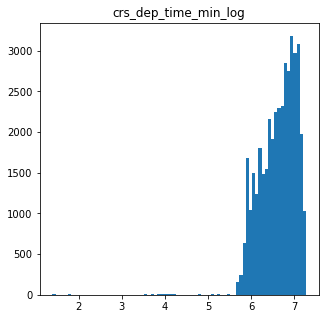

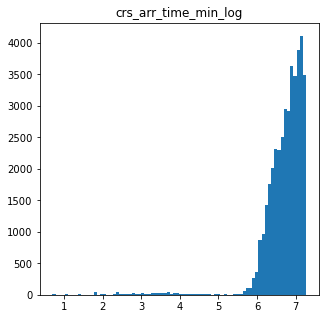

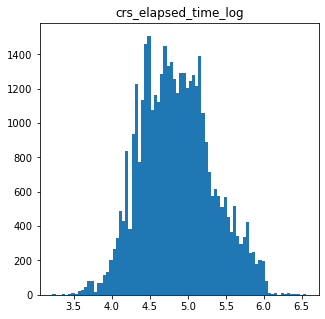

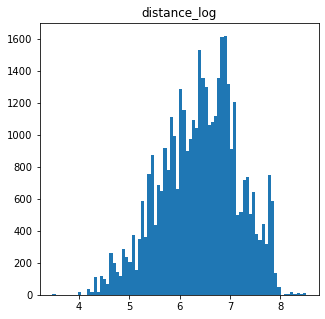

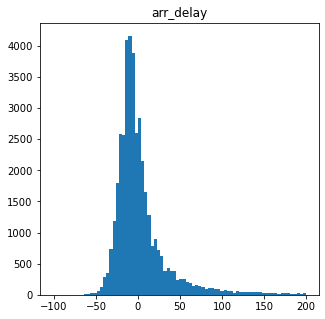

In [33]:
for col in ['crs_dep_time_min_log', 'crs_arr_time_min_log', 'crs_elapsed_time_log', 'distance_log', 'arr_delay']:
    plt.figure(figsize=(5,5))
    plt.hist(train_set[col], bins=80)
    plt.title(col)
    plt.show()

### Training set: features and target

In [17]:
y_train = train_set['arr_delay'].values
y_train[:5]

array([-1., -3.,  5., -9., -3.])

In [18]:
X_train = train_set[['crs_dep_time_min_log', 'crs_elapsed_time_log']].values
X_train[:5]

array([[6.91373735, 4.40671925],
       [6.60800063, 4.82028157],
       [6.54534966, 4.73619845],
       [6.43133108, 4.51085951],
       [7.03878354, 5.27299956]])

### Functions for model evaluation

In [34]:
# Function to evaluate the model and compute the RMSE

from sklearn.metrics import mean_squared_error

def compute_rmse(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    return rmse



# Function to display the scores

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

## Linear Regression

### Features: 'crs_dep_time_min_log', 'crs_elapsed_time_log'

In [20]:
# Train a Linear Regression model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Training error (RMSE) for the Linear Regression model
lin_rmse = compute_rmse(lin_reg, X_train, y_train)
print("RMSE (training):", lin_rmse)

# R-squared
lin_r2 = lin_reg.score(X_train, y_train)
print("R-squared (training):", lin_r2)

RMSE (training): 31.754005697198767
R-squared (training): 0.015389055385729766


In [35]:
# Evaluation using cross-validation - RMSE

from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=5)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [31.61504961 31.66999409 31.15314363 31.87064349 32.46423679]
Mean: 31.754613521750496
Standard deviation: 0.42554264250577445


## Test set: 1 Jan 2019 - 7 Jan 2019

In [25]:
test_set = pd.read_csv('../data/test_jan2019.csv')
test_set.shape

(16570, 43)

In [26]:
# Add new columns (convert hhmm time into minutes)
test_set['crs_dep_time_min'] = test_set['crs_dep_time'].map(lambda x: hhmm_to_min(x))
test_set['crs_arr_time_min'] = test_set['crs_arr_time'].map(lambda x: hhmm_to_min(x))

In [27]:
# New columns - Log transformations

test_set['crs_elapsed_time_log'] = test_set['crs_elapsed_time'].apply(np.log1p)
test_set['distance_log'] = test_set['distance'].apply(np.log1p)
test_set['crs_dep_time_min_log'] = test_set['crs_dep_time_min'].apply(np.log1p)
test_set['crs_arr_time_min_log'] = test_set['crs_arr_time_min'].apply(np.log1p)

### Test set: features and target

In [28]:
y_test = test_set['arr_delay'].values
y_test.shape

(16570,)

In [29]:
X_test = test_set[['crs_dep_time_min_log', 'crs_elapsed_time_log']].values
X_test.shape

(16570, 2)

### Predictions for the test set

In [31]:
# Test error (RMSE) for the Linear Regression model
lin_rmse_test = compute_rmse(lin_reg, X_test, y_test)
print("RMSE (test):", lin_rmse_test)

# R-squared
lin_r2_test = lin_reg.score(X_test, y_test)
print("R-squared (test):", lin_r2_test)

RMSE (test): 47.83442275635432
R-squared (test): 0.004573328505496521
